# El método del codo y el factor de la silueta del clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [ ]:
# nos inventamos un dataset:

In [3]:
x1 = np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2 = np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])
X = np.array(list(zip(x1,x2))).reshape(len(x1), 2)
X

array([[3, 5],
       [1, 4],
       [1, 5],
       [2, 6],
       [1, 5],
       [6, 8],
       [6, 6],
       [6, 7],
       [5, 6],
       [6, 7],
       [7, 1],
       [8, 2],
       [9, 1],
       [8, 2],
       [9, 3],
       [9, 2],
       [8, 3]])

In [ ]:
# tenemos 17 puntos

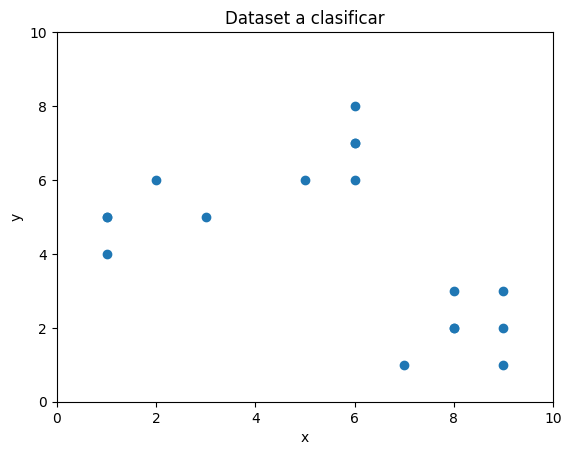

In [7]:
plt.plot()
plt.xlim([0,10])  # le ponemos estos límites al plot que está dentro del rango de nuestros puntos
plt.ylim([0,10])
plt.title("Dataset a clasificar")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x1,x2)
plt.show()

In [ ]:
# a simple vista puedo decir que hay tres cluster, o bien puedo decir que hay 5, si punto (7,1) lo separo del resto y los puntos (4,4) y (4,5) también.....veremos.....

## Método de la silueta

In [ ]:
######### voy a hacer impresiones parciales del código completo del profesor para ver que va salinendo poco a poco ###########

In [10]:
max_k = 10                                                                              # maximo número de clusters que vamos a crear; 
K = range(1,max_k)                                                                      # es decir, vamos a crear 9 clusters, con un grupo y hasta 9
ssw = []                                                                                # suma de los cuadrados internos
cmap = cm.get_cmap("Spectral")                                                          # eligo una paleta de colores
color_palette = [cmap(float(i)/max_k) for i in K]
centroid = [sum(X)/len(X) for i in K]
sst = sum(np.min(cdist(X, centroid, "euclidean"), axis = 1))                            # hacemos los minimos por filas


for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    print(f"1ºEsto es el kmeanModel: {kmeanModel}")                                       ######### (print mío)                                    
    
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    print(f"2ºEsto son los centers: {centers}")                                           ######### (print mío)   
    labels = kmeanModel.labels_                                                         
    print(f"3ºEsto son los labels: {labels}\n")                                             ######### (print mío) 

    ssw_k = sum(np.min(cdist(X, kmeanModel.cluster_centers_, "euclidean"), axis = 1))   # mide la distancia de cada punto X al centro del cluster
    ssw.append(ssw_k)
    
    label_color = [color_palette[i] for i in labels]

<ipython-input-10-e3d91205a6bb>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Spectral")                                                          # eligo una paleta de colores
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

1ºEsto es el kmeanModel: KMeans(n_clusters=1)
2ºEsto son los centers:           0         1
0  5.588235  4.294118
3ºEsto son los labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

1ºEsto es el kmeanModel: KMeans(n_clusters=2)
2ºEsto son los centers:           0    1
0  3.700000  5.9
1  8.285714  2.0
3ºEsto son los labels: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]

1ºEsto es el kmeanModel: KMeans(n_clusters=3)
2ºEsto son los centers:           0    1
0  1.600000  5.0
1  8.285714  2.0
2  5.800000  6.8
3ºEsto son los labels: [0 0 0 0 0 2 2 2 2 2 1 1 1 1 1 1 1]

1ºEsto es el kmeanModel: KMeans(n_clusters=4)
2ºEsto son los centers:      0         1
0  5.8  6.800000
1  7.0  1.000000
2  1.6  5.000000
3  8.5  2.166667
3ºEsto son los labels: [2 2 2 2 2 0 0 0 0 0 1 3 3 3 3 3 3]

1ºEsto es el kmeanModel: KMeans(n_clusters=5)
2ºEsto son los centers:      0         1
0  7.0  1.000000
1  2.5  5.500000
2  5.8  6.800000
3  8.5  2.166667
4  1.0  4.666667
3ºEsto son los labels: [1 4 4 1 4 2 2 2 2 2 0 3 3 3 3 3 3]



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1ºEsto es el kmeanModel: KMeans(n_clusters=6)
2ºEsto son los centers:      0         1
0  1.0  4.666667
1  8.5  2.166667
2  6.0  7.333333
3  2.5  5.500000
4  5.5  6.000000
5  7.0  1.000000
3ºEsto son los labels: [3 0 0 3 0 2 4 2 4 2 5 1 1 1 1 1 1]

1ºEsto es el kmeanModel: KMeans(n_clusters=7)
2ºEsto son los centers:       0         1
0  1.00  4.666667
1  5.50  6.000000
2  9.00  1.500000
3  8.25  2.500000
4  2.50  5.500000
5  6.00  7.333333
6  7.00  1.000000
3ºEsto son los labels: [4 0 0 4 0 5 1 5 1 5 6 3 2 3 3 2 3]

1ºEsto es el kmeanModel: KMeans()
2ºEsto son los centers:      0         1
0  1.0  4.666667
1  8.5  3.000000
2  6.0  7.333333
3  2.0  6.000000
4  7.0  1.000000
5  8.5  1.750000
6  3.0  5.000000
7  5.5  6.000000
3ºEsto son los labels: [6 0 0 3 0 2 7 2 7 2 4 5 5 5 1 5 1]



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1ºEsto es el kmeanModel: KMeans(n_clusters=9)
2ºEsto son los centers:      0         1
0  8.5  3.000000
1  1.0  4.666667
2  6.0  7.333333
3  9.0  1.500000
4  3.0  5.000000
5  7.0  1.000000
6  5.5  6.000000
7  8.0  2.000000
8  2.0  6.000000
3ºEsto son los labels: [4 1 1 8 1 2 6 2 6 2 5 7 3 7 0 3 0]



<ipython-input-12-fc58bf849848>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Spectral")                                                          # eligo una paleta de colores
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Esto es el kmeanModel: KMeans(n_clusters=1)
Esto son los centers:           0         1
0  5.588235  4.294118
Esto son los labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


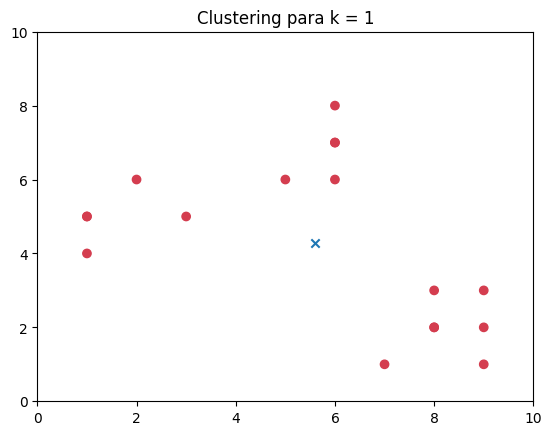

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Esto es el kmeanModel: KMeans(n_clusters=2)
Esto son los centers:           0    1
0  8.285714  2.0
1  3.700000  5.9
Esto son los labels: [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
* Para k =  2  el promedio de la silueta es de : 0.6113424368705715
   - Para i =  1  la silueta del cluster vale :  0.7746251901389686
   - Para i =  2  la silueta del cluster vale :  0.49704450958269375


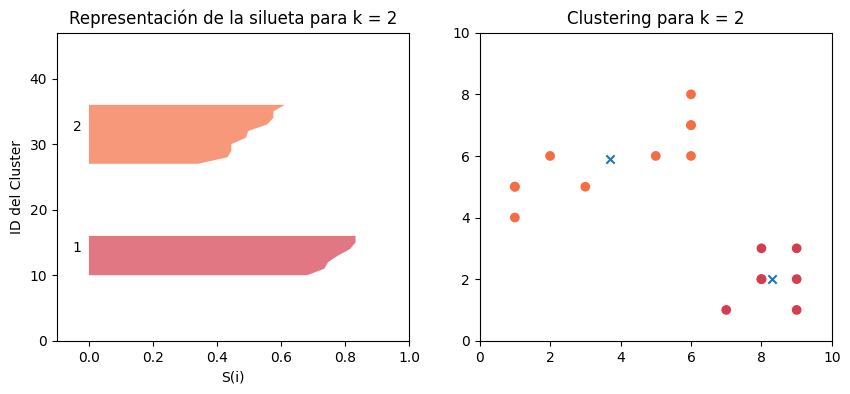

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Esto es el kmeanModel: KMeans(n_clusters=3)
Esto son los centers:           0    1
0  8.285714  2.0
1  1.600000  5.0
2  5.800000  6.8
Esto son los labels: [1 1 1 1 1 2 2 2 2 2 0 0 0 0 0 0 0]
* Para k =  3  el promedio de la silueta es de : 0.7122079383287169
   - Para i =  1  la silueta del cluster vale :  0.7345257364682265
   - Para i =  2  la silueta del cluster vale :  0.6609508863896014
   - Para i =  3  la silueta del cluster vale :  0.7322200728725188


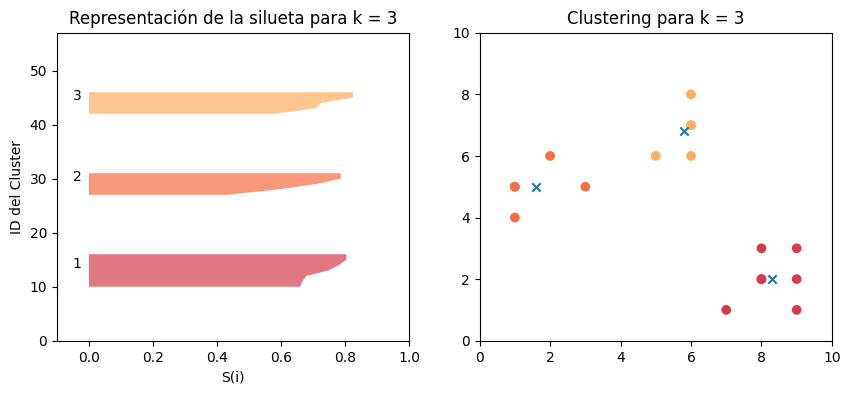

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Esto es el kmeanModel: KMeans(n_clusters=4)
Esto son los centers:      0    1
0  8.0  1.0
1  5.8  6.8
2  1.6  5.0
3  8.4  2.4
Esto son los labels: [2 2 2 2 2 1 1 1 1 1 0 3 0 3 3 3 3]
* Para k =  4  el promedio de la silueta es de : 0.5229622444317962
   - Para i =  1  la silueta del cluster vale :  -0.09040786759303471
   - Para i =  2  la silueta del cluster vale :  0.7298167646370725
   - Para i =  3  la silueta del cluster vale :  0.6609508863896014
   - Para i =  4  la silueta del cluster vale :  0.42346712707864664


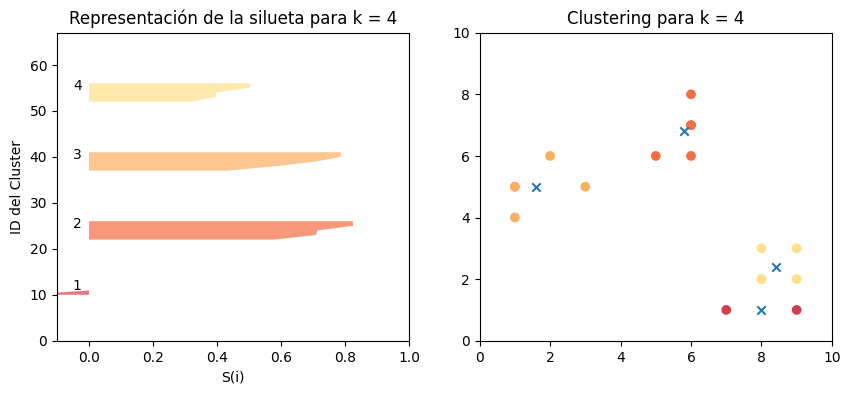

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Esto es el kmeanModel: KMeans(n_clusters=5)
Esto son los centers:           0         1
0  5.500000  6.000000
1  8.285714  2.000000
2  1.000000  4.666667
3  2.500000  5.500000
4  6.000000  7.333333
Esto son los labels: [3 2 2 3 2 4 0 4 0 4 1 1 1 1 1 1 1]
* Para k =  5  el promedio de la silueta es de : 0.5730476047724169
   - Para i =  1  la silueta del cluster vale :  0.32882042637679976
   - Para i =  2  la silueta del cluster vale :  0.7051132786996257
   - Para i =  3  la silueta del cluster vale :  0.655666655624379
   - Para i =  4  la silueta del cluster vale :  0.24096929517637128
   - Para i =  5  la silueta del cluster vale :  0.5664789734180768


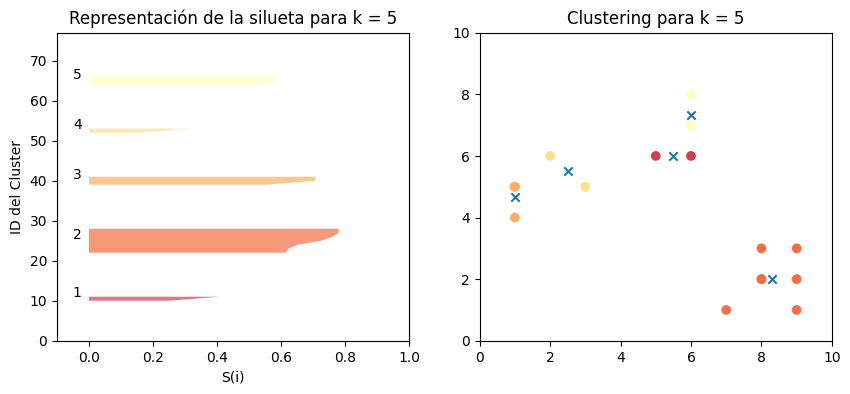

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Esto es el kmeanModel: KMeans(n_clusters=6)
Esto son los centers:       0         1
0  2.50  5.500000
1  9.00  2.000000
2  5.50  6.000000
3  1.00  4.666667
4  6.00  7.333333
5  7.75  2.000000
Esto son los labels: [0 3 3 0 3 4 2 4 2 4 5 5 1 5 1 1 5]
* Para k =  6  el promedio de la silueta es de : 0.3799069154256582
   - Para i =  1  la silueta del cluster vale :  0.24096929517637128
   - Para i =  2  la silueta del cluster vale :  0.1804754830212678
   - Para i =  3  la silueta del cluster vale :  0.32882042637679976
   - Para i =  4  la silueta del cluster vale :  0.655666655624379
   - Para i =  5  la silueta del cluster vale :  0.5664789734180768
   - Para i =  6  la silueta del cluster vale :  0.2777436957346689


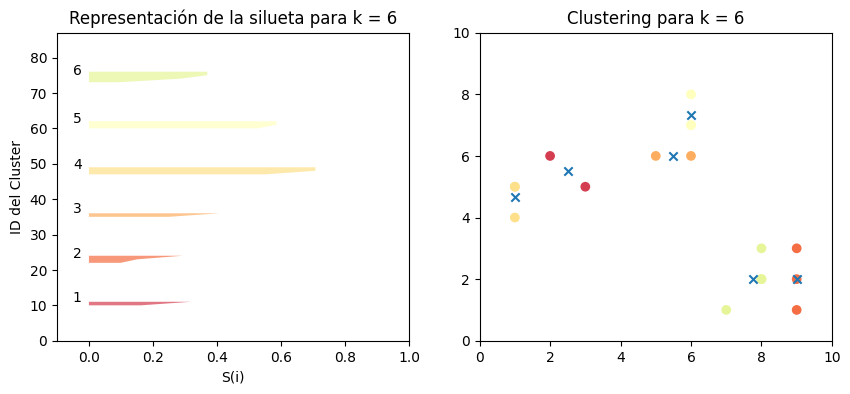

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Esto es el kmeanModel: KMeans(n_clusters=7)
Esto son los centers:           0         1
0  9.000000  1.500000
1  2.500000  5.500000
2  6.000000  7.333333
3  8.500000  3.000000
4  1.000000  4.666667
5  7.666667  1.666667
6  5.500000  6.000000
Esto son los labels: [1 4 4 1 4 2 6 2 6 2 5 5 0 5 3 0 3]
* Para k =  7  el promedio de la silueta es de : 0.42012495980374426
   - Para i =  1  la silueta del cluster vale :  0.2751262658470836
   - Para i =  2  la silueta del cluster vale :  0.24096929517637128
   - Para i =  3  la silueta del cluster vale :  0.5664789734180768
   - Para i =  4  la silueta del cluster vale :  0.31256470041698214
   - Para i =  5  la silueta del cluster vale :  0.655666655624379
   - Para i =  6  la silueta del cluster vale :  0.3869086846339371
   - Para i =  7  la silueta del cluster vale :  0.32882042637679976


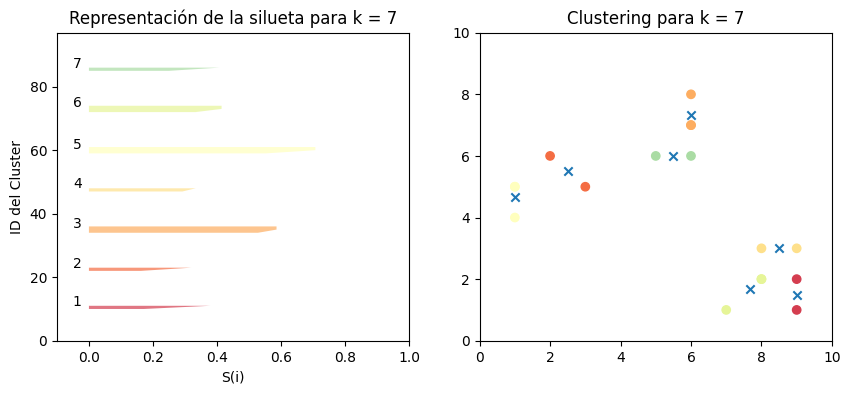

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Esto es el kmeanModel: KMeans()
Esto son los centers:      0         1
0  8.5  3.000000
1  3.0  5.000000
2  5.5  6.000000
3  1.0  4.666667
4  7.0  1.000000
5  8.5  1.750000
6  6.0  7.333333
7  2.0  6.000000
Esto son los labels: [1 3 3 7 3 6 2 6 2 6 4 5 5 5 0 5 0]
* Para k =  8  el promedio de la silueta es de : 0.35345323083317454
   - Para i =  1  la silueta del cluster vale :  0.3028895866899326
   - Para i =  2  la silueta del cluster vale :  0.0
   - Para i =  3  la silueta del cluster vale :  0.32882042637679976
   - Para i =  4  la silueta del cluster vale :  0.6152265411044983
   - Para i =  5  la silueta del cluster vale :  0.0
   - Para i =  6  la silueta del cluster vale :  0.30004208861569454
   - Para i =  7  la silueta del cluster vale :  0.5664789734180768
   - Para i =  8  la silueta del cluster vale :  0.0


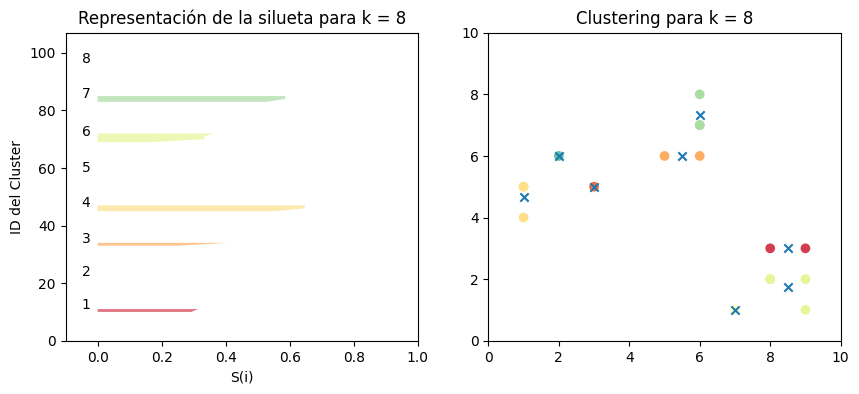

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Esto es el kmeanModel: KMeans(n_clusters=9)
Esto son los centers:      0         1
0  1.0  4.666667
1  9.0  1.500000
2  6.0  7.333333
3  8.0  2.333333
4  2.0  6.000000
5  3.0  5.000000
6  9.0  3.000000
7  5.5  6.000000
8  7.0  1.000000
Esto son los labels: [5 0 0 4 0 2 7 2 7 2 8 3 1 3 6 1 3]
* Para k =  9  el promedio de la silueta es de : 0.34011594848992555
   - Para i =  1  la silueta del cluster vale :  0.6152265411044983
   - Para i =  2  la silueta del cluster vale :  0.20382042637679978
   - Para i =  3  la silueta del cluster vale :  0.5664789734180768
   - Para i =  4  la silueta del cluster vale :  0.39052429175126996
   - Para i =  5  la silueta del cluster vale :  0.0
   - Para i =  6  la silueta del cluster vale :  0.0
   - Para i =  7  la silueta del cluster vale :  0.0
   - Para i =  8  la silueta del cluster vale :  0.32882042637679976
   - Para i =  9  la silueta del cluster vale :  0.0


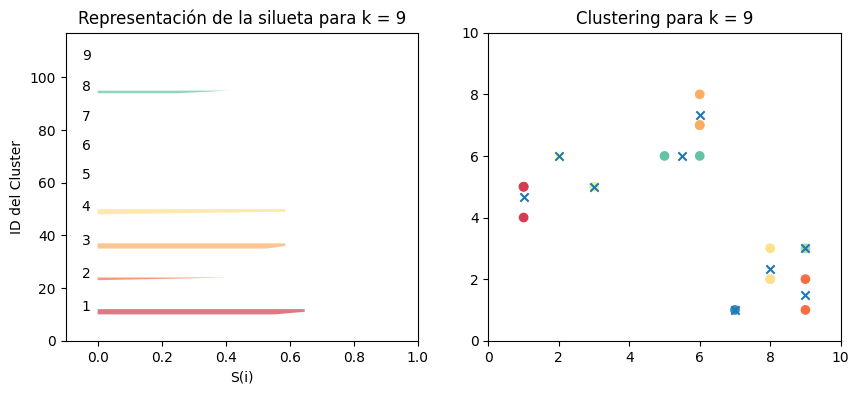

In [12]:
max_k = 10                                                                              # maximo número de clusters que vamos a crear; 
K = range(1,max_k)                                                                      # es decir, vamos a crear 9 clusters, con un grupo y hasta 9
ssw = []                                                                                # suma de los cuadrados internos
cmap = cm.get_cmap("Spectral")                                                          # eligo una paleta de colores
color_palette = [cmap(float(i)/max_k) for i in K]
centroid = [sum(X)/len(X) for i in K]
sst = sum(np.min(cdist(X, centroid, "euclidean"), axis = 1))                            # hacemos los minimos por filas


for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    print(f"Esto es el kmeanModel: {kmeanModel}")                                       ######### (print mío)                                    
    
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    print(f"Esto son los centers: {centers}")                                           ######### (print mío)   
    labels = kmeanModel.labels_                                                         
    print(f"Esto son los labels: {labels}")                                             ######### (print mío) 

    ssw_k = sum(np.min(cdist(X, kmeanModel.cluster_centers_, "euclidean"), axis = 1))   # mide la distancia de cada punto X al centro del cluster
    ssw.append(ssw_k)
    
    label_color = [color_palette[i] for i in labels]
    
    ##Fabricaremos una silueta para cada cluster
    # Por seguridad, no hacemos silueta si k = 1 o k = len(X)   # no podemos hacer silueta con solo un punto o con todos los puntos (python no puede)
    if 1<k<len(X):
       ##Crear un subplot de una fila y dos columnas
        fig, (axis1,axis2) = plt.subplots(1,2)
        fig.set_size_inches(10,4)
    
        #El primer subplot contendrá la silueta, que puede tener valores desde -1 a 1 (por teoría)
        #En nuestro caso, ya controlamos que los valores están entre -0.1 y 1 (escalamos el gráfico, pero si no lo sabemos, ponemos (-1,1)
        axis1.set_xlim([-0.1, 1.0])
        #El número de clusters a insertar determinará el tamaño de cada barra
        #El coeficiente (n_clusters+1)*10 será el espacio en blanco que dejaremos entre siluetas individuales de cada cluster para separarlas.
        axis1.set_ylim([0, len(X)+ (k+1)*10])   #siempre habrá 10 espacios en blanco entre silueta y silueta para que se vean mejor, pero vamos, que sea 10 u otro valor, es cosa nuestra
    
        silhouette_avg = silhouette_score(X, labels)
        print("* Para k = ",k, " el promedio de la silueta es de :",silhouette_avg)
        sample_silhouette_values = silhouette_samples(X, labels)
        
        y_lower = 10
        for i in range(k):
            #Agregamos la silueta del cluster i-ésimo
            ith_cluster_sv = sample_silhouette_values[labels == i]
            print("   - Para i = ", i+1, " la silueta del cluster vale : ", np.mean(ith_cluster_sv))
            #Ordenamos descendientemente las siluetas del cluster i-ésimo
            ith_cluster_sv.sort()
        
            #Calculamos donde colocar la primera silueta en el eje vertical
            ith_cluster_size = ith_cluster_sv.shape[0]   # me quedo con el numero de filas para el tamaño
            y_upper = y_lower + ith_cluster_size
            
            #Elegimos el color del cluster
            color = color_palette[i]
            
            #Pintamos la silueta del cluster i-ésimo
            axis1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sv, facecolor = color, alpha = 0.7)
            
            
            #Etiquetamos dicho cluster con el número en el centro
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i+1))
            
            #Calculamos el nuevo y_lower para el siguiente cluster del gráfico
            y_lower = y_upper + 10 #dejamos vacías 10 posiciones sin muestra
            
        axis1.set_title("Representación de la silueta para k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("ID del Cluster")
        
        ##Fin de la representación de la silueta
        
    ##Plot de los k-means con los puntos respectivos
    plt.plot()
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title("Clustering para k = %s"%str(k))
    plt.scatter(x1,x2, c=label_color)
    plt.scatter(centers[0], centers[1], marker = "x")
    plt.show()

In [ ]:
# observamos en lo de arriba lo siguiente:

# cluster = 2:
    # el promedio de la silueta es 0.61 y el de cada cluster es 0.77 y 0.49 (demasiado dispares, no es un cluster válido)

# cluster = 3:
    # el promedio de la silueta es 0.71 y el de cada cluster es 0.73, 0.66 y 0.73 (ya empiezan a parecerse)

# cluster = 4:
    # hay una que canta mucho

# y vamos viendo que a medida que aumentamos los cluster los resultados son peores

##Método del codo




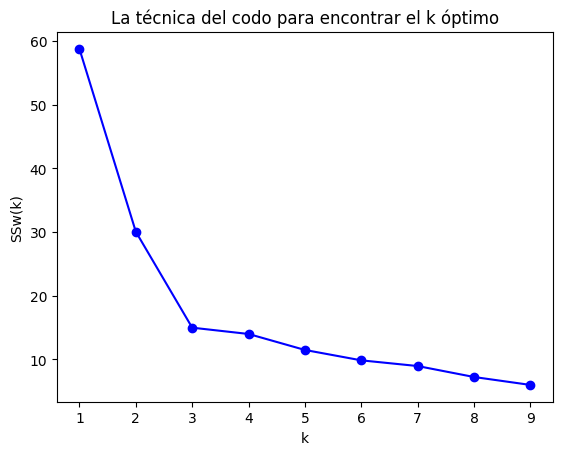

In [14]:
plt.plot(K, ssw, "bo-")
plt.xlabel("k")
plt.ylabel("SSw(k)")
plt.title("La técnica del codo para encontrar el k óptimo")
plt.show()

##Método del codo normalizado

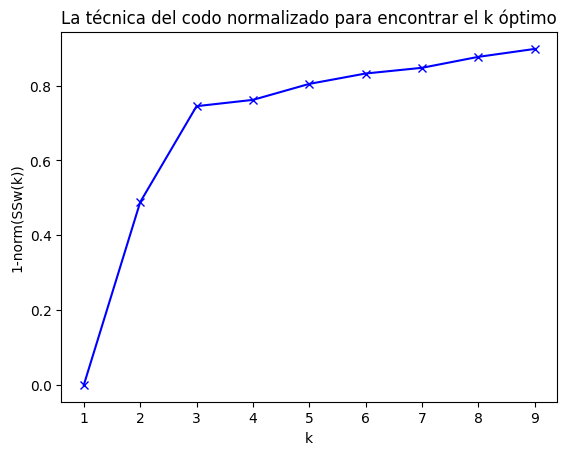

In [15]:
plt.plot(K, 1-ssw/sst, "bx-")
plt.xlabel("k")
plt.ylabel("1-norm(SSw(k))")
plt.title("La técnica del codo normalizado para encontrar el k óptimo")
plt.show()

In [ ]:
# concluimos que el mejor cluster es de k=3